10


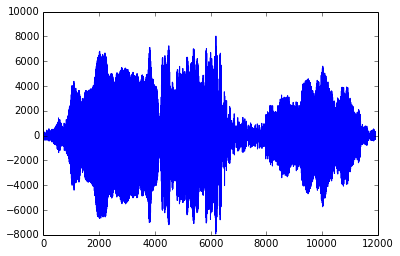

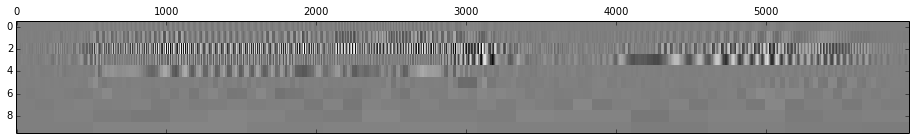

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import wave
import pywt

w = wave.open('aa_1490_1258.wav')

sample = w.readframes(w.getnframes())
waveform = np.fromstring(sample, 'Int16')
plt.plot(waveform)

levels = 10
coeffs = pywt.wavedec(waveform, 'db2', level=levels)
size = len(waveform)/2

m = np.zeros((levels,size))
print len(coeffs[1:])

binsize = 1
for i, coeffs_level in enumerate(reversed(coeffs[1:])):
    l = coeffs_level.shape[0]
    for j in xrange(l):
        c = coeffs_level[j]
        m[i, (j)*binsize:(j)*(binsize*2)] = c
    binsize *= 2

plt.matshow(m, aspect='auto', cmap=plt.cm.gray)

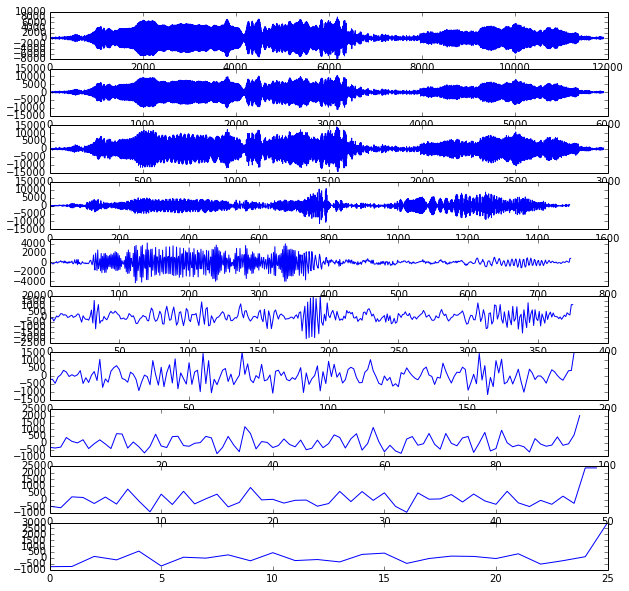

In [2]:
plt.figure(figsize=(10,10))
rec = pywt.waverec(coeffs, 'db2')
plt.subplot(10,1,1)
plt.plot(rec)
for i in range(9):
    rec = pywt.waverec(coeffs[0:-(i+1)], 'db2')
    plt.subplot(10,1,i+2)
    plt.plot(rec)

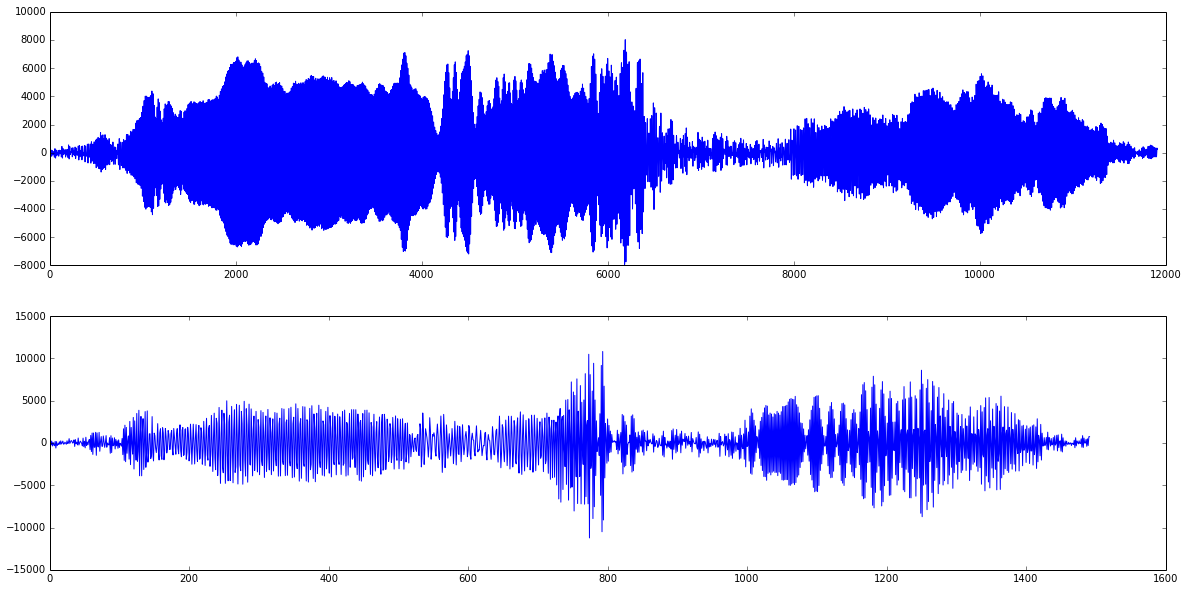

In [8]:
exclude = [8,9]
coeffs_new = list(coeffs)
for e in exclude:
    coeffs_new[e] = np.zeros(coeffs[e].shape)
rec = pywt.waverec(coeffs, 'db2')
rec_new = pywt.waverec(coeffs[0:8], 'db2')
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(rec)
plt.subplot(2,1,2)
plt.plot(rec_new)

In [6]:


signal = "".join((wave.struct.pack('h', item) for item in rec))
signal_new = "".join((wave.struct.pack('h', item) for item in rec_new))

# prepate output file
output = wave.open('out.wav', 'w')
output.setparams((1, 2, 44100, 0, 'NONE', 'not compressed'))
output.writeframes(signal)
output.close()

# prepate output file
output = wave.open('out_new.wav', 'w')
output.setparams((1, 2, 5512, 0, 'NONE', 'not compressed'))
output.writeframes(signal_new)
output.close()

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: integer argument expected, got float
  app.launch_new_instance()
/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: integer argument expected, got float
